In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pyplot as plt

In [2]:
columns = ['POO_LATITUDE', 'POO_LONGITUDE', 'DISCOVERY_DATE']
fire_data_df = pd.read_csv('https://stacks.stanford.edu/file/druid:xj043rd8767/xj043rd8767_fire_reports_2014-2017.csv', usecols=columns, low_memory=False)

In [3]:
def get_year(date):
    if pd.isnull(date):
        return 0
    else:
        return dateutil.parser.parse(date).year
fire_data_df['DISCOVERY_YEAR'] = fire_data_df['DISCOVERY_DATE'].apply(get_year)
fire_data_df = fire_data_df[fire_data_df['DISCOVERY_YEAR'].between(2014, 2017)]

The wild fire number is increasing these years

Text(0.5, 1.0, 'Wire Fire per Year')

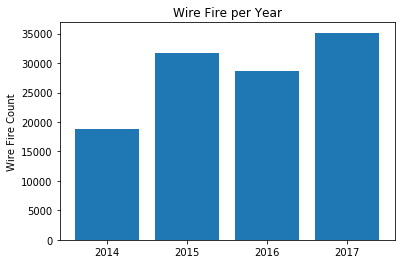

In [4]:
fire_year_count = fire_data_df.groupby('DISCOVERY_YEAR').count().reset_index()

years = fire_year_count['DISCOVERY_YEAR']
plt.bar(years, fire_year_count['DISCOVERY_DATE'], align='center')
plt.xticks(years, years)
plt.ylabel('Wire Fire Count')
plt.title('Wire Fire per Year')

In [63]:
def draw_wild_fire_location():
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 10.))
    m.drawmeridians(np.arange(-180., 181., 10.))
    m.drawmapboundary(fill_color='aqua')

    x , y = m(np.array(fire_data_df['POO_LONGITUDE']), np.array(fire_data_df['POO_LATITUDE']))
    m.plot(x,y,'g.')

    plt.title('Wild Fire Location')
    plt.show()

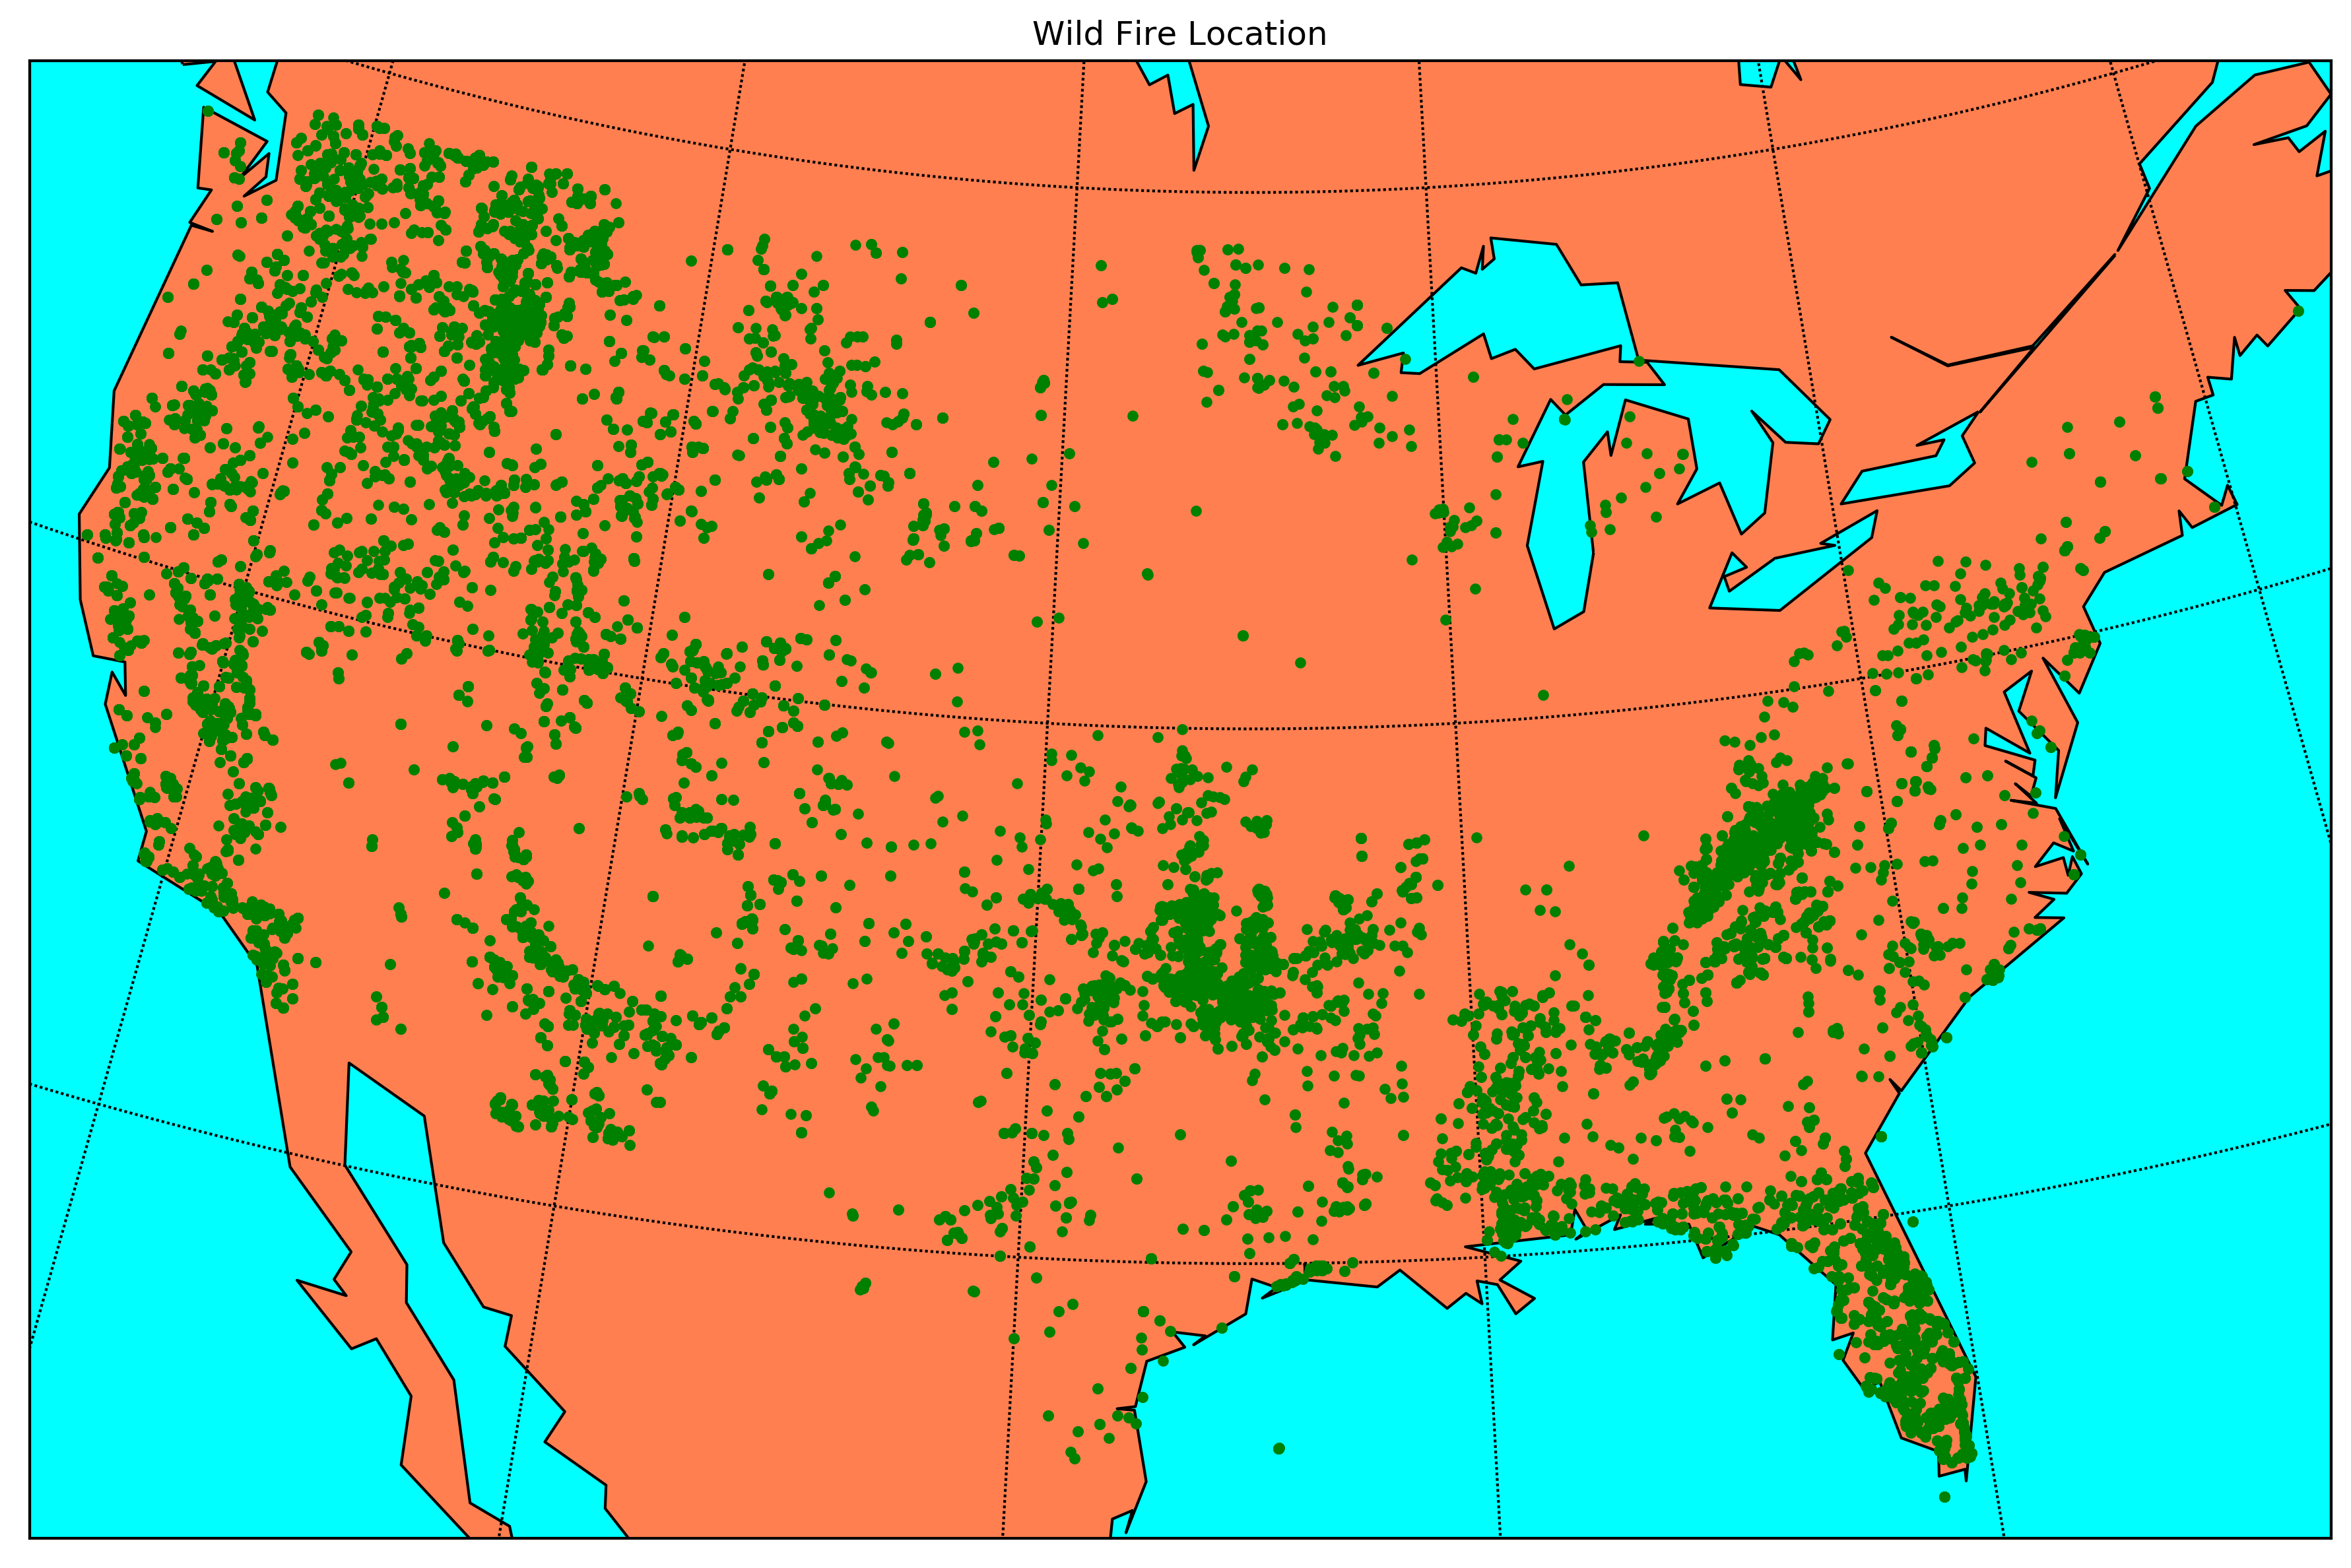

In [64]:
draw_wild_fire_location()